In [267]:
#Setting It Up
#I collected all of the data above and combined them into one dataframe. The code and details are located here. One challenge was the periodicity of the various features. Our exchange data is daily, some data is monthly, and others quarterly. For our daily exchange rates, I took the last value of each month. For the quarterly data, I copied the quarterly value to each month in that quarter. This gives us a dataframe of monthly data that is easier to work with.
#First, we will import the libraries we will be using and also load our data into a Pandas dataframe.

# Import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import seaborn as sn
import sklearn

# Python magic to show plots inline in the notebook
%matplotlib inline
plt.style.use('ggplot')
import datetime as dt
from datetime import datetime
import math

In [17]:
# Import data
df = pd.read_csv("C:/Users/Kingsley/Desktop/allcars.csv")

In [18]:
print(df)

         Unnamed: 0 timeStamp  tripID  \
0                 0   45:59.0       0   
1                 1   46:00.0       0   
2                 2   46:01.0       0   
3                 3   46:02.0       0   
4                 4   46:03.0       0   
5                 5   46:04.0       0   
6                 6   46:05.0       0   
7                 7   46:06.0       0   
8                 8   46:07.0       0   
9                 9   46:08.0       0   
10               10   46:09.0       0   
11               11   46:10.0       0   
12               12   46:11.0       0   
13               13   46:12.0       0   
14               14   46:13.0       0   
15               15   46:14.0       0   
16               16   46:15.0       0   
17               17   46:16.0       0   
18               18   46:17.0       0   
19               19   46:18.0       0   
20               20   46:19.0       0   
21               21   46:20.0       0   
22               22   46:21.0       0   
23              

In [19]:
#It is a good practice to understand the data first and try to gather as many insights from it. 
#EDA is all about making sense of data in hand,before getting them dirty with it.

#1. Check for Missing Data
#2. Heatmap & Data Structure
#3. Correlations
#4. Uncover a parsimonious model, one which explains the data with a minimum number of predictor variables.
df.head()

Unnamed: 0 timeStamp  tripID  \
0           0   45:59.0       0   
1           1   46:00.0       0   
2           2   46:01.0       0   
3           3   46:02.0       0   
4           4   46:03.0       0   

                                             accData  gps_speed  battery  \
0  ffb0fd700220fff43fffe74808e73e03f33400ef33fbe1...        2.2    14.48   
1  00b0fda802e804e14104ed3d01ee3a08ec4c04f738fbd5...        3.7    14.48   
2  00f0fe5002b0fdea4009e33c01ed3701ec4100f53b05e8...        3.9    14.54   
3  0120fdc0028804e03c10de3a09e8400ce43b0ae63b01f4...        3.9    14.56   
4  00a0fde802d816e0370ae73604e23b04e53900e542ffea...        4.7    14.48   

   cTemp  dtc      eLoad  iat  imap  kpl  maf     rpm  speed  tAdv       tPos  \
0    NaN  NaN  44.313725  NaN   NaN  0.0  0.0   903.0    4.0   NaN  15.686275   
1    NaN  NaN  35.294118  NaN   NaN  0.0  0.0   938.0    6.0   NaN  15.294118   
2    NaN  NaN  29.411765  NaN   NaN  0.0  0.0  1044.5    7.0   NaN  14.901961   
3    NaN  NaN  53.725490  NaN   NaN  0.0  0.0  1102.0    7.0   NaN  17.647059   
4    NaN  NaN  75.686275  NaN   NaN  0.0  0.0  1626.5   10.0   NaN  23.529412   

   deviceID  
0         1  
1         1  
2         1  
3         1  
4         1

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106460 entries, 117459 to 223933
Data columns (total 18 columns):
Unnamed: 0    106460 non-null int64
timeStamp     106460 non-null object
tripID        106460 non-null int64
accData       106460 non-null object
gps_speed     106460 non-null float64
battery       106460 non-null float64
cTemp         106460 non-null float64
dtc           106460 non-null float64
eLoad         106460 non-null float64
iat           106460 non-null float64
imap          106460 non-null float64
kpl           106460 non-null float64
maf           106460 non-null float64
rpm           106460 non-null float64
speed         106460 non-null float64
tAdv          106460 non-null float64
tPos          106460 non-null float64
deviceID      106460 non-null int64
dtypes: float64(13), int64(3), object(2)
memory usage: 15.4+ MB


In [20]:
#Check for Missing Data
df.isnull().values.any()

True

In [21]:
# Show rows where any cell has a NaN
df[df.isnull().any(axis=1)].shape

(942115, 18)

In [22]:
#### Drop cells with NaN
df = df.dropna(axis=0,subset=['cTemp'])
df = df.dropna(axis=0,subset=['dtc'])
df = df.dropna(axis=0,subset=['iat'])
df = df.dropna(axis=0,subset=['imap'])
df = df.dropna(axis=0,subset=['tAdv'])

In [23]:
# Show rows where any cell has a NaN
df[df.isnull().any(axis=1)].shape

(0, 18)

In [24]:
df.describe()

Unnamed: 0         tripID      gps_speed   battery          cTemp  \
count  106460.000000  106460.000000  106460.000000  106460.0  106460.000000   
mean    53428.476893      63.697849      18.222948       0.0      64.143575   
std     30732.539133      38.719864      18.727147       0.0      29.107386   
min       184.000000       0.000000       0.000000       0.0       0.000000   
25%     26813.750000      25.000000       0.000000       0.0      60.000000   
50%     53428.500000      60.000000      13.600000       0.0      80.000000   
75%     80043.250000      99.000000      27.800000       0.0      81.000000   
max    106658.000000     126.000000      82.100000       0.0      84.000000   

            dtc          eLoad            iat           imap       kpl  \
count  106460.0  106460.000000  106460.000000  106460.000000  106460.0   
mean        0.0      35.477576      31.122901      96.442175       0.0   
std         0.0      22.502089      15.797552      47.344598       0.0   
min         0.0       0.000000       0.000000       0.000000       0.0   
25%         0.0      22.352941      24.000000      97.000000       0.0   
50%         0.0      38.823529      34.000000      99.000000       0.0   
75%         0.0      48.235294      43.000000     110.000000       0.0   
max         0.0      94.901961      58.000000     221.000000       0.0   

            maf            rpm          speed      tAdv      tPos  deviceID  
count  106460.0  106460.000000  106460.000000  106460.0  106460.0  106460.0  
mean        0.0    1183.945900      33.075089       0.0       0.0       2.0  
std         0.0     759.576518      33.972104       0.0       0.0       0.0  
min         0.0       0.000000       0.000000       0.0       0.0       2.0  
25%         0.0     800.750000       0.000000       0.0       0.0       2.0  
50%         0.0    1167.750000      25.000000       0.0       0.0       2.0  
75%         0.0    1733.500000      50.000000       0.0       0.0       2.0  
max         0.0    3566.000000     149.000000       0.0       0.0       2.0

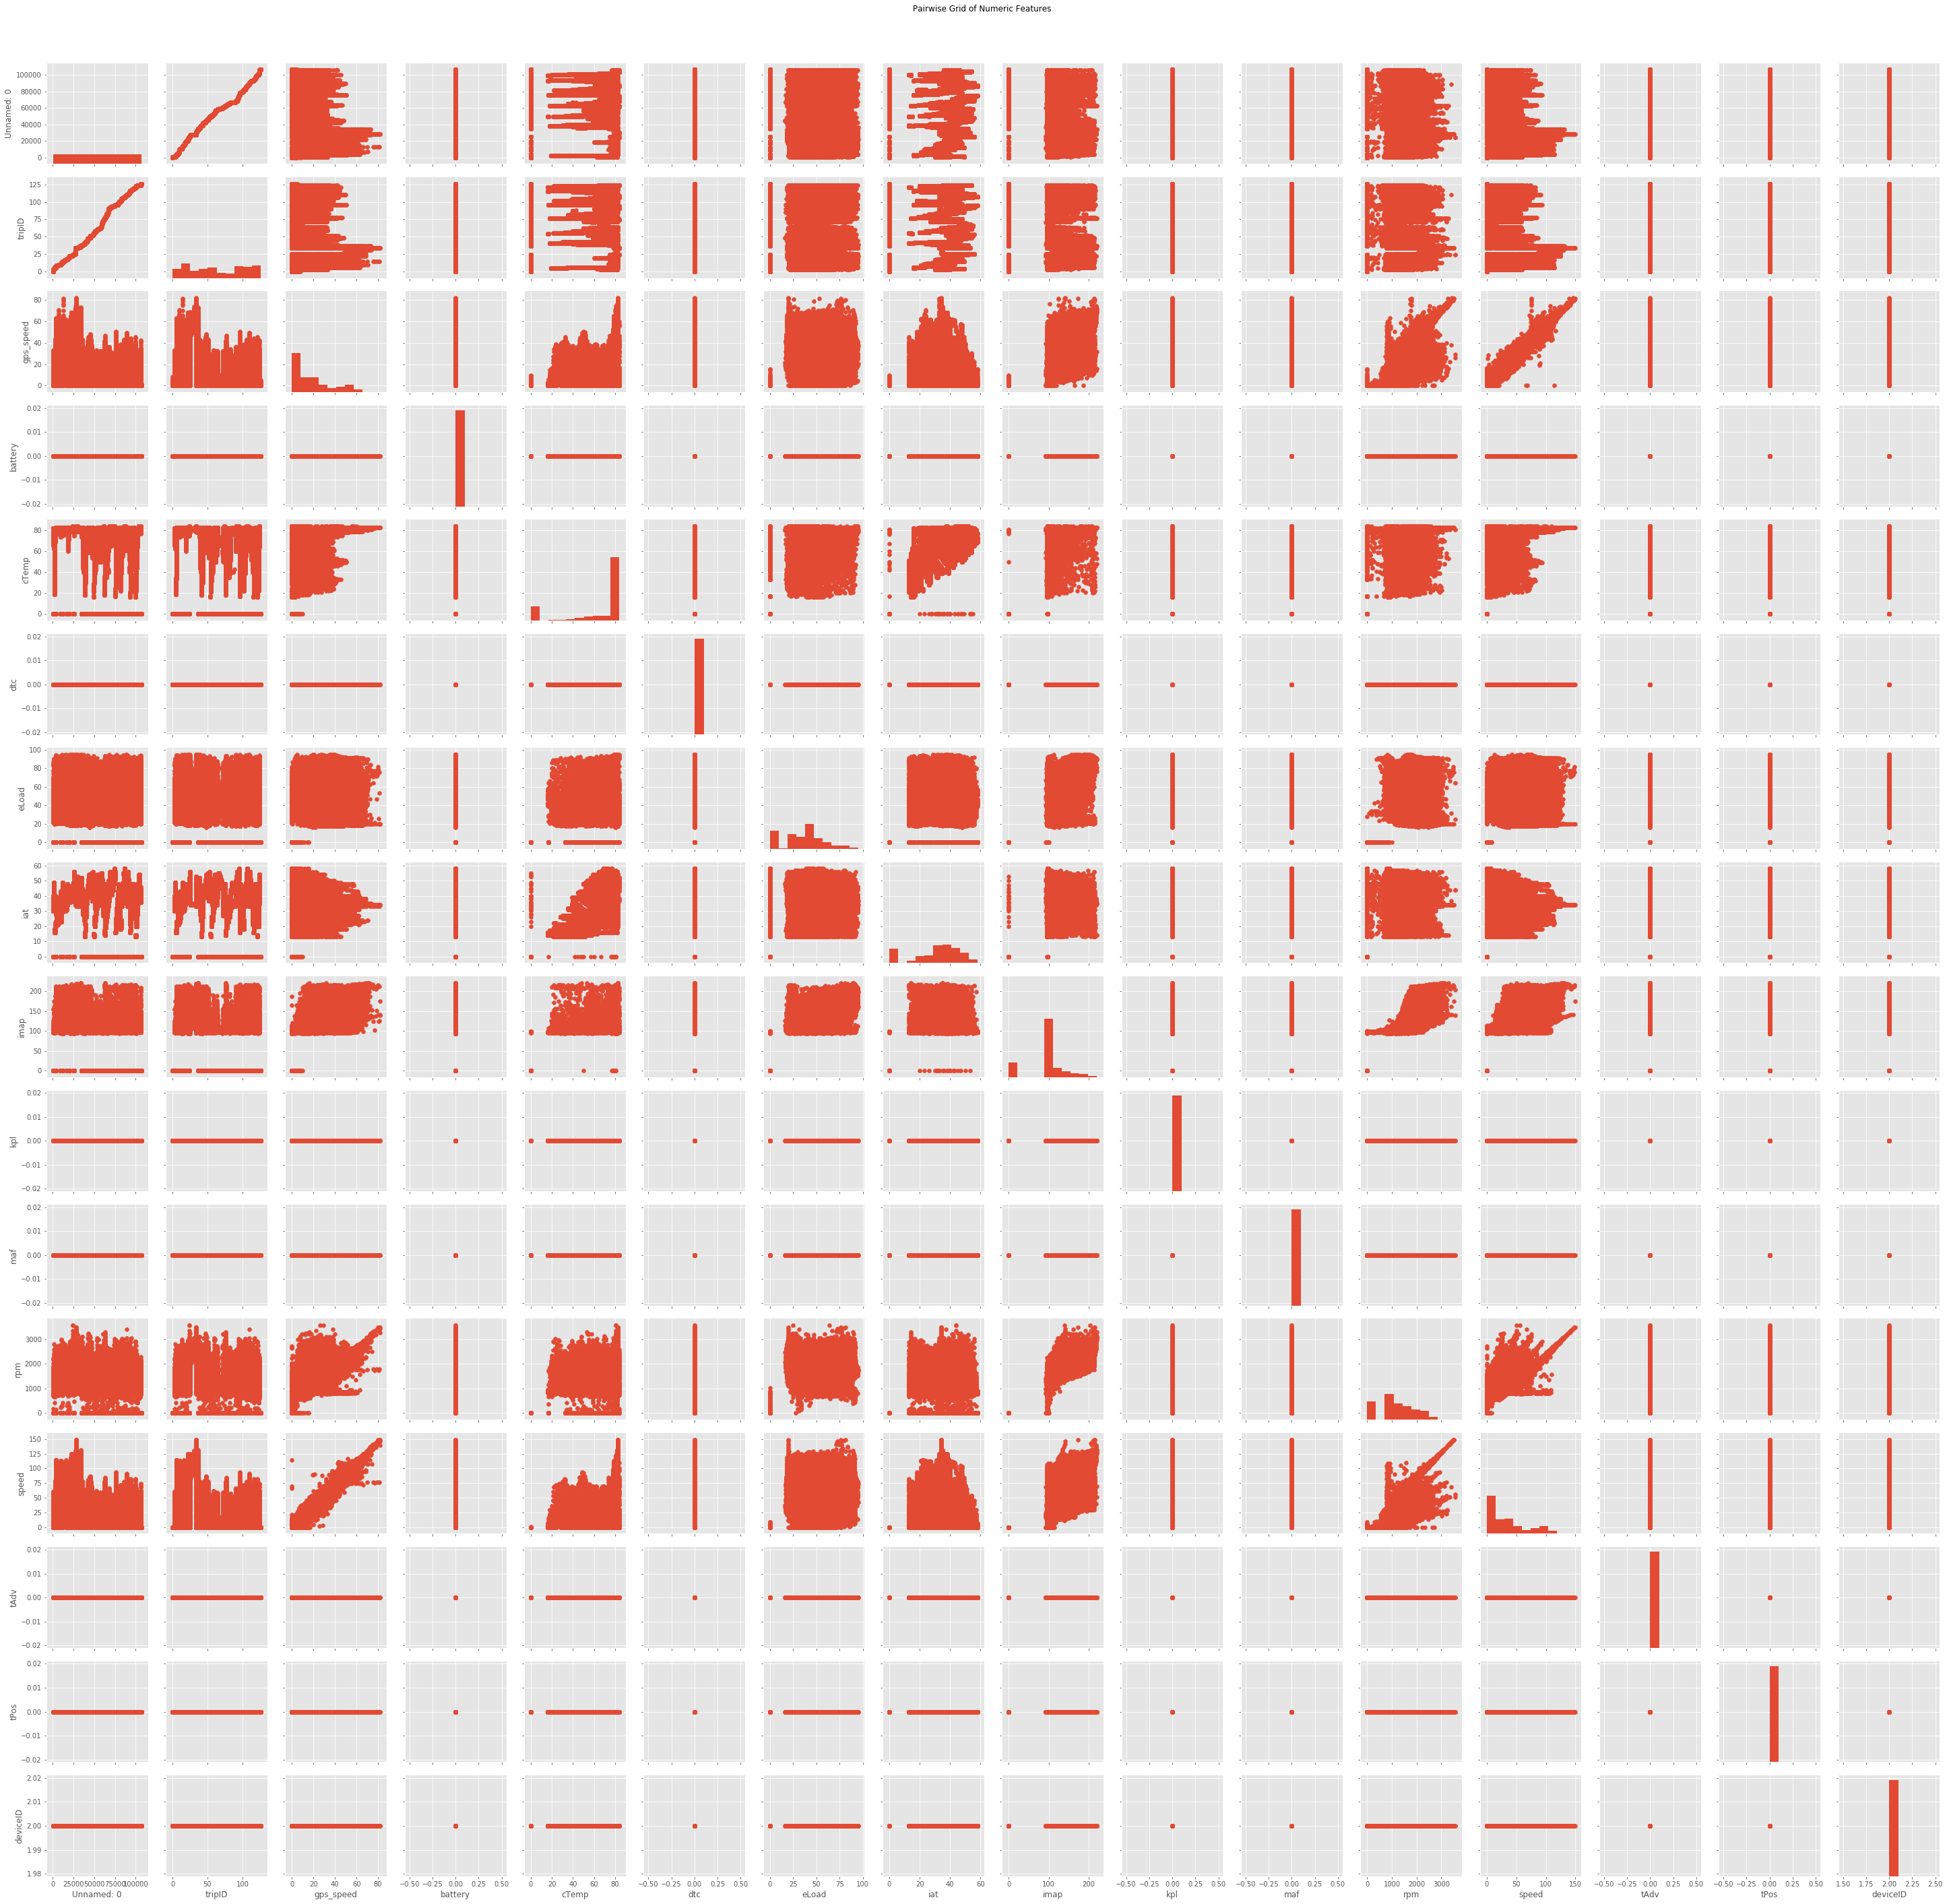

In [26]:
# Seaborn doesn't handle NaN values, so we can fill them with 0 for now.
df = df.fillna(value=0)

# Pair grid of key variables.
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Pairwise Grid of Numeric Features');

Text(0.5,1,'Correlation Heatmap of Numeric Features')

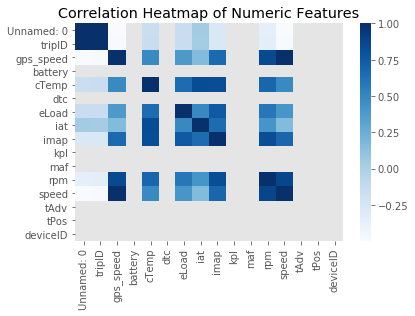

In [37]:
#To use linear regression for modelling,its necessary to remove correlated variables to improve your model.
#One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using a heatmap in seaborn.

corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap='Blues')
plt.title('Correlation Heatmap of Numeric Features')

#The very light and very dark boxes show a strong positive or negative correlation between the features. A positive correlation would be that as the USDNGN exchange rate increases (the currency depreciates) the other feature increases as well. A negative correlation is the opposite. As the exchange rate rises the other features decreases.
#We are particularly interested in correlations to the USD feature. M2 and Inflation and currency have strong correlations but does not prove a causal relationship.

In [191]:
#Select variables with complete dataset (no nan or zero)
df1 = pd.DataFrame(df,columns=['tripID','gps_speed','cTemp','eLoad','iat','imap','rpm','speed'])

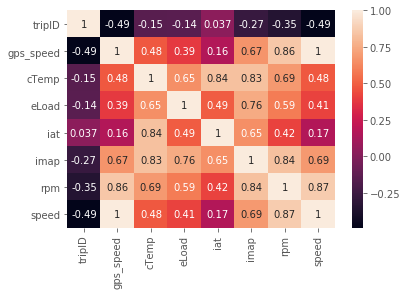

In [192]:
#Remove correlated variables before feature selection.
corrMatrix = df1.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

#Here, it can be infered that IAT – In-dash automatic transmission “iat” has strong positive correlation with circular temperature “cTemp”
#whereas it has strong negative correlation with “alcohol”.



In [209]:
#Make final dataset
df.columns

Index(['Unnamed: 0', 'timeStamp', 'tripID', 'accData', 'gps_speed', 'battery',
       'cTemp', 'dtc', 'eLoad', 'iat', 'imap', 'kpl', 'maf', 'rpm', 'speed',
       'tAdv', 'tPos', 'deviceID', 'tripID-lag1', 'tripID-lag2', 'tripID-lag3',
       'tripID-lag4', 'gps_speed-lag1', 'gps_speed-lag2', 'gps_speed-lag3',
       'gps_speed-lag4', 'cTemp-lag1', 'cTemp-lag2', 'cTemp-lag3',
       'cTemp-lag4', 'eLoad-lag1', 'eLoad-lag2', 'eLoad-lag3', 'eLoad-lag4',
       'iat-lag1', 'iat-lag2', 'iat-lag3', 'iat-lag4', 'imap-lag1',
       'imap-lag2', 'imap-lag3', 'imap-lag4', 'rpm-lag1', 'rpm-lag2',
       'rpm-lag3', 'rpm-lag4', 'speed-lag1', 'speed-lag2', 'speed-lag3',
       'speed-lag4', 'month', 'year', 'gps_speed-lag1-diff',
       'gps_speed-lag2-diff', 'gps_speed-lag3-diff', 'y3', 'y6', 'y12'],
      dtype='object')

In [210]:
cols = df.columns.tolist()

In [195]:
df1.to_csv('allcars.csv')

In [196]:
df1.dtypes

tripID         int64
gps_speed    float64
cTemp        float64
eLoad        float64
iat          float64
imap         float64
rpm          float64
speed        float64
dtype: object

In [197]:
# FEATURE ENGINEERING
# Define custom function to create lag values
def feature_lag(features):
    for feature in features:
        df[feature + '-lag1'] = df[feature].shift(1)
        df[feature + '-lag2'] = df[feature].shift(2)
        df[feature + '-lag3'] = df[feature].shift(3)
        df[feature + '-lag4'] = df[feature].shift(4)

# Define columns to create lags for
features = ['tripID','gps_speed','cTemp','eLoad','iat','imap','rpm','speed']

# Call custom function
feature_lag(features)

In [198]:
#predict gps speed 3, 6, and 12 months ahead.

df1['y3'] = df.gps_speed.shift(-3)
df1['y6'] = df.gps_speed.shift(-6)
df1['y12'] = df.gps_speed.shift(-12)

In [212]:
df1 = df1.dropna(axis=0,subset=['y3'])
df1 = df1.dropna(axis=0,subset=['y6'])
df1 = df1.dropna(axis=0,subset=['y12'])


In [213]:
df1.dtypes

tripID         int64
gps_speed    float64
cTemp        float64
eLoad        float64
iat          float64
imap         float64
rpm          float64
speed        float64
y3           float64
y6           float64
y12          float64
dtype: object

In [216]:
#Split into Training and Test Data
#Cross validation is always desired when training machine learning models to be able to trust the generality of the model created. We will split our data into training and test data using Scikit learn's built in tools. Also for scikit learn we need to separate our dataset into inputs and the feature being predicted (or X's and y's).

y = df1['gps_speed']

In [217]:
X = df1.drop(['gps_speed'], axis=1)

In [218]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [219]:
X_train.shape, y_train.shape

((74513, 10), (74513,))

In [220]:
X_test.shape, y_test.shape

((31935, 10), (31935,))

In [221]:
X.columns

Index(['tripID', 'cTemp', 'eLoad', 'iat', 'imap', 'rpm', 'speed', 'y3', 'y6',
       'y12'],
      dtype='object')

In [206]:
df1.dtypes

tripID         int64
gps_speed    float64
cTemp        float64
eLoad        float64
iat          float64
imap         float64
rpm          float64
speed        float64
y3           float64
y6           float64
y12          float64
dtype: object

In [222]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
# Create linear regression object
regr = LinearRegression()

In [223]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [225]:
# Make predictions using the testing set
lin_pred = regr.predict(X_test)

In [226]:
linear_regression_score = regr.score(X_test, y_test)
linear_regression_score

0.9925489189517546

In [227]:
linear_regression_score = regr.score(X_train, y_train)
linear_regression_score

0.9923194367832849

In [228]:
from math import sqrt
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

Coefficients: 
 [-4.80717894e-04  4.17246956e-02 -1.85684512e-02 -9.45400424e-03
 -1.56901951e-02 -1.03784532e-03  5.86184055e-01  5.43109400e-02
 -1.18445019e-01  3.86888018e-02]
Root mean squared error: 1.62
Mean absolute error: 0.99
R-squared: 0.99


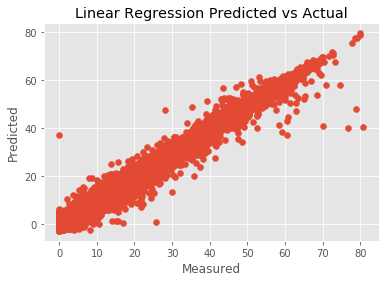

In [229]:
plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

In [230]:
### Neural Network Regression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
mlp = MLPRegressor()

In [231]:
# Train the model using the training sets
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [232]:
# Score the model
neural_network_regression_score = mlp.score(X_test, y_test)
neural_network_regression_score

0.9926696763865832

In [233]:
# Score the model
neural_network_regression_score = mlp.score(X_train, y_train)
neural_network_regression_score

0.9925597345470252

In [234]:
# Make predictions using the testing set
nnr_pred = mlp.predict(X_test)

In [235]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

Root mean squared error: 1.61
Mean absolute error: 1.01
R-squared: 0.99


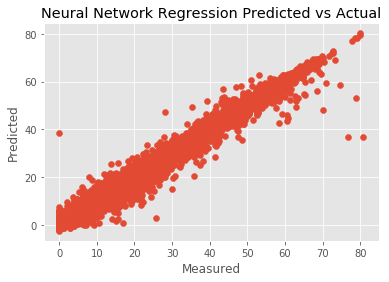

In [236]:
plt.scatter(y_test, nnr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()

In [237]:
###Lasso
from sklearn.linear_model import Lasso

lasso = Lasso()

In [238]:
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [239]:
# Score the model
lasso_score = lasso.score(X_test, y_test)
lasso_score

0.9923086310446717

In [240]:
# Score the model
lasso_score = lasso.score(X_train, y_train)
lasso_score

0.9920410049477479

In [241]:
# Make predictions using the testing set
lasso_pred = lasso.predict(X_test)

In [242]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))

# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lasso_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lasso_pred))

Root mean squared error: 1.65
Mean absolute error: 0.99
R-squared: 0.99


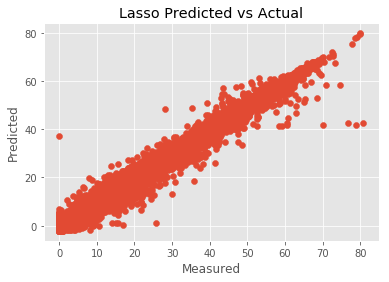

In [243]:
plt.scatter(y_test, lasso_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Predicted vs Actual')
plt.show()

In [244]:
##ElasticNet
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [245]:
elasticnet_score = elasticnet.score(X_test, y_test)
elasticnet_score

0.9923404691889874

In [246]:
elasticnet_score = elasticnet.score(X_test, y_test)
elasticnet_score

0.9923404691889874

In [247]:
elasticnet_pred = elasticnet.predict(X_test)

In [248]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, elasticnet_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, elasticnet_pred))

Root mean squared error: 1.64
Mean absolute error: 0.99
R-squared: 0.99


In [249]:
###Decision Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Random Forrest Regressor object
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

In [250]:
# Train the model using the training sets
regr_rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [251]:
regr_rf.fit(X_test, y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [252]:
# Score the model
decision_forest_score = regr_rf.score(X_test, y_test)
decision_forest_score

0.9993148789215262

In [253]:
# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_test)

In [254]:
from math import sqrt
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

Root mean squared error: 0.49
Mean absolute error: 0.27
R-squared: 1.00


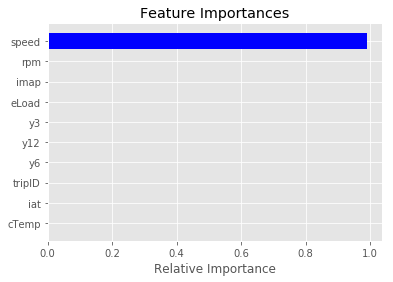

In [255]:
features = X.columns
importances = regr_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

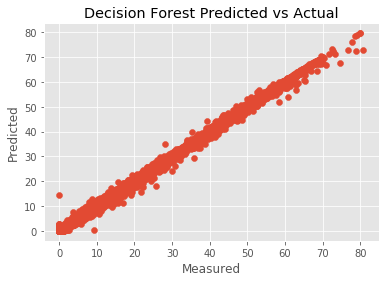

In [256]:
plt.scatter(y_test, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual')
plt.show()

In [257]:
#Extra Trees Regression

from sklearn.ensemble import ExtraTreesRegressor

extra_tree = ExtraTreesRegressor(n_estimators=200, random_state=1234)

In [258]:
extra_tree.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
          oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [259]:
extratree_score = extra_tree.score(X_test, y_test)
extratree_score

0.9953993058895532

In [260]:
extratree_score = extra_tree.score(X_train, y_train)
extratree_score

0.9999897264247072

In [261]:
extratree_pred = extra_tree.predict(X_test)

In [262]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, extratree_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, extratree_pred))

Root mean squared error: 1.27
Mean absolute error: 0.70
R-squared: 1.00


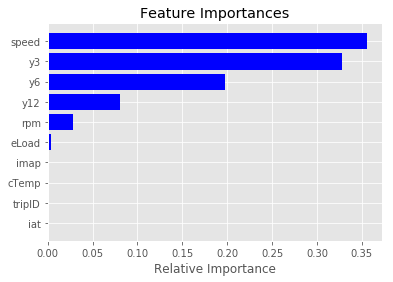

In [263]:
features = X.columns
importances = extra_tree.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

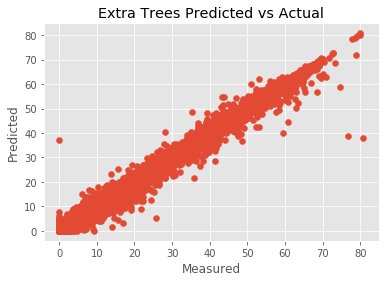

In [264]:
plt.scatter(y_test, extratree_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Extra Trees Predicted vs Actual')
plt.show()

In [266]:
#Evaluate Models
print("Scores:")
print("Linear regression score: ", linear_regression_score)
print("Neural network regression score: ", neural_network_regression_score)
print("Lasso regression score: ", lasso_score)
print("ElasticNet regression score: ", elasticnet_score)
print("Decision forest score: ", decision_forest_score)
print("Extra Trees score: ", extratree_score)
print("\n")
print("RMSE:")
print("Linear regression RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
print("Neural network RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
print("Lasso RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))
print("ElasticNet RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))
print("Decision forest RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
print("Extra Trees RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))

Scores:
Linear regression score:  0.9923194367832849
Neural network regression score:  0.9925597345470252
Lasso regression score:  0.9920410049477479
ElasticNet regression score:  0.9923404691889874
Decision forest score:  0.9993148789215262
Extra Trees score:  0.9999897264247072


RMSE:
Linear regression RMSE: 1.62
Neural network RMSE: 1.61
Lasso RMSE: 1.65
ElasticNet RMSE: 1.64
Decision forest RMSE: 0.49
Extra Trees RMSE: 1.27
